In [80]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [81]:
data = pd.read_csv('../data/lym/lymphography.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
print(data[feature_columns].nunique())

f2     4
f3     2
f4     2
f5     2
f6     2
f7     2
f8     2
f9     2
f10    3
f11    4
f12    3
f13    4
f14    4
f15    8
f16    3
f17    2
f18    2
f19    8
dtype: int64


In [82]:
print(feature_columns)

['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']


In [83]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [84]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [85]:
feature_columns=[ 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18','f19']
feature_columns1=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17']
feature_columns2=['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15']
feature_columns3=[ 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']
feature_columns4=[ 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
feature_columns5=[ 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
feature_columns6=[ 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
feature_columns7=[ 'f2', 'f3', 'f4', 'f5']
feature_columns8=['f2', 'f3']

print(fitness_function(feature_columns8,data,'target'))

0.3225489051379903
0.23738233093071806


In [89]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.23738233093071806
y=0.3225489051379903
for i in a:
    b.append(x + i * y)
print(b)

[0.23738233093071806, 0.2696372214445171, 0.3018921119583161, 0.33414700247211515, 0.3664018929859142, 0.39865678349971323, 0.4309116740135122, 0.46316656452731125, 0.49542145504111035, 0.5276763455549093, 0.5599312360687083]


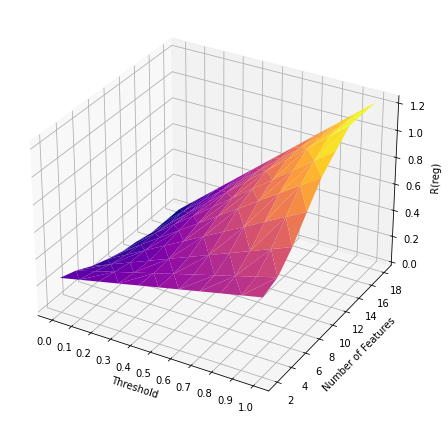

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2,4,6,8,10,12,14,16,18]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.23738233093071806, 0.2696372214445171, 0.3018921119583161, 0.33414700247211515, 0.3664018929859142, 0.39865678349971323, 0.4309116740135122, 0.46316656452731125, 0.49542145504111035, 0.5276763455549093, 0.5599312360687083],
    [0.1933432331385185, 0.23430776716799454, 0.2752723011974706, 0.31623683522694657, 0.35720136925642265, 0.3981659032858986, 0.4391304373153747, 0.4800949713448507, 0.5210595053743268, 0.5620240394038027, 0.6029885734332788],
    [0.12853004838298954, 0.18792808374009237, 0.2473261190971952, 0.306724154454298, 0.3661221898114009, 0.4255202251685037, 0.4849182605256065, 0.5443162958827092, 0.6037143312398122, 0.663112366596915, 0.7225104019540178],
    [0.08312757201646091, 0.16281297462314648, 0.24249837722983203, 0.3221837798365176, 0.4018691824432032, 0.48155458504988874, 0.5612399876565742, 0.6409253902632598, 0.7206107928699454, 0.800296195476631, 0.8799815980833166],
    [0.045725760183591514, 0.14446132698953545, 0.2431968937954794, 0.34193246060142335, 0.4406680274073673, 0.5394035942133112, 0.6381391610192552, 0.7368747278251991, 0.8356102946311431, 0.934345861437087, 1.033081428243031],
    [0.02845528455284553, 0.1388820465674425, 0.24930880858203947, 0.35973557059663636, 0.47016233261123336, 0.5805890946258303, 0.6910158566404272, 0.8014426186550242, 0.9118693806696212, 1.0222961426842183, 1.1327229046988152],
        [0.0, 0.12276775019465805, 0.2455355003893161, 0.3683032505839741, 0.4910710007786322, 0.6138387509732902, 0.7366065011679482, 0.8593742513626063, 0.9821420015572644, 1.1049097517519224, 1.2276775019465804],
    [0.0, 0.12276775019465805, 0.2455355003893161, 0.3683032505839741, 0.4910710007786322, 0.6138387509732902, 0.7366065011679482, 0.8593742513626063, 0.9821420015572644, 1.1049097517519224, 1.2276775019465804],
       [0.0, 0.12276775019465805, 0.2455355003893161, 0.3683032505839741, 0.4910710007786322, 0.6138387509732902, 0.7366065011679482, 0.8593742513626063, 0.9821420015572644, 1.1049097517519224, 1.2276775019465804]
])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('R(reg)')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2,4,6,8,10,12,14,16,18]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()

